In [2]:
import numpy as np
import pandas as pd
import os

%matplotlib inline
from matplotlib import pyplot as plt

In [11]:
datadir = '../tfhub_mobilenet'
pcts = [ '01pct', '02pct', '05pct', '10pct', '25pct', '75pct' ]
positions = [0.1, 0.2, 0.5, 0.1, 0.25, 0.75]
datafiles = [os.path.join(datadir, pct, 'processed_perf.tsv') for pct in pcts]

In [12]:
df = pd.read_csv(datafiles[0], header=0, index_col=0, sep='\t')
df.head()

,Slide,Region_area,TotalAcc,EpitheliumAcc,EpitheliumF1,Class_Label,Stroma_Area,G3,G4/G5,BN,ST
1304706_00,1304706,1047.0,0.468004,0.519068,0.683403,G3,103,490,149,305,0
1304732_00,1304732,2720.0,0.098529,0.101247,0.183877,G3,73,268,1178,1201,0
1304700_00,1304700,872.0,0.360092,0.407792,0.579336,G3,102,314,83,373,0
1305445_00,1305445,1729.0,0.582996,0.594690,0.745838,G4/G5,34,10,1008,677,0
1304716_00,1304716,1343.0,0.353686,0.374901,0.545350,G3,76,475,88,704,0


In [19]:
col = 'EpitheliumF1'
def get_performance(fpath, col=col):
    print(fpath)
    df = pd.read_csv(fpath, header=0, index_col=0, sep='\t')
    f1 = df[col].values
    return f1

f1_scores = [get_performance(fpath) for fpath in datafiles]

../tfhub_mobilenet/01pct/processed_perf.tsv
../tfhub_mobilenet/02pct/processed_perf.tsv
../tfhub_mobilenet/05pct/processed_perf.tsv
../tfhub_mobilenet/10pct/processed_perf.tsv
../tfhub_mobilenet/25pct/processed_perf.tsv
../tfhub_mobilenet/75pct/processed_perf.tsv


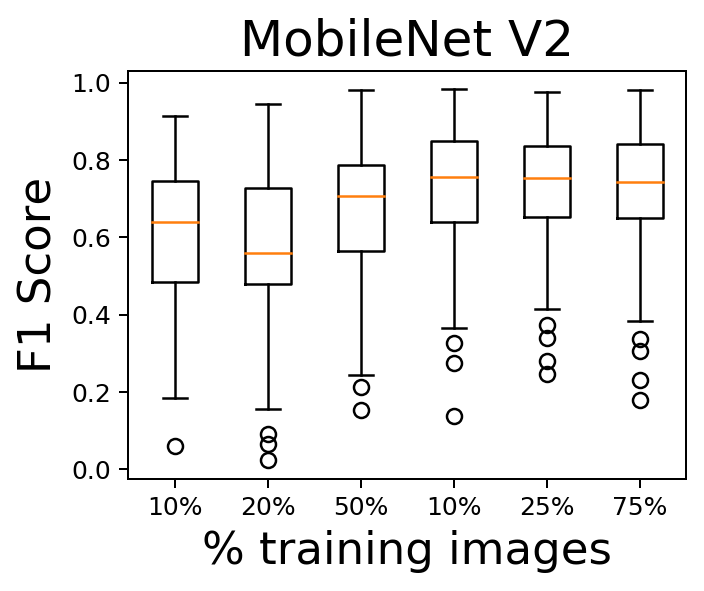

In [33]:
plt.figure(figsize=(4,3), dpi=180)
_ = plt.boxplot(f1_scores)
plt.ylabel('F1 Score', fontsize = 18)
plt.xlabel('% training images', fontsize = 18)
plt.title('MobileNet V2', fontsize=20)
_ = plt.xticks(np.arange(1, len(f1_scores)+1), ['{:2.0f}%'.format(x*100) for x in positions])